Installing dependencies

In [617]:
%%capture
%pip install scipy matplotlib


Importing modules

In [618]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

Reading Wav file

In [619]:

sample_rate, data = wavfile.read('sounds/Alesis-Fusion-Acoustic-Bass-C2.wav')
left_data = data[:, 0]
print(f"number of samples = {data.shape[0]}")
data

number of samples = 127782


<ipython-input-619-43b3774cd2e6>:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.



array([[-127, -145],
       [-126, -135],
       [-149, -176],
       ...,
       [   5,    0],
       [  -5,    2],
       [   2,   -4]], dtype=int16)

In [620]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')


sample len: 2.897551020408163s


The waveform

''

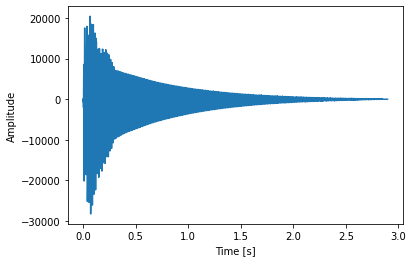

In [626]:
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")
time = np.linspace(0., length, left_data.shape[0])
pl.plot(time, left_data)
;

the frequency domain of the first frame

''

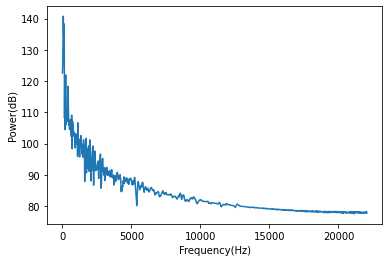

In [622]:
p = 20*np.log10(np.abs(np.fft.rfft(left_data[0:2048])))
f = np.linspace(0, sample_rate/2.0, len(p))

pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.plot(f, p)
;

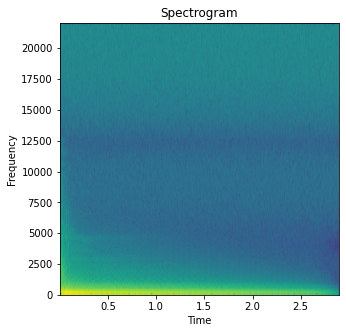

In [623]:
plt.figure(figsize=(5,5))

plt.title('Spectrogram')
plt.specgram(left_data,Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<ipython-input-624-128ab866ade9>:1: RuntimeWarning:

divide by zero encountered in log10



''

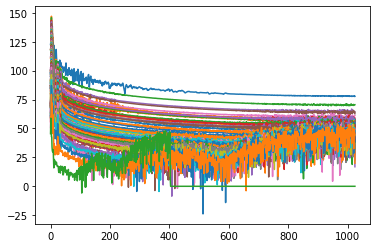

In [624]:
full_fft_data = [20*np.log10(np.abs((np.fft.rfft(left_data[start_range:start_range + 2048]))))
  for start_range in range(0, left_data.shape[0], 2048)]


# windows = [arr * np.hamming(arr.shape[0]) for arr in full_fft_data]
padded = [np.pad(arr, (0, full_fft_data[0].shape[0] - arr.shape[0])) for arr in full_fft_data]

stack = np.stack(padded)
[plt.plot(frame) for frame in stack]
;

/home/lleonard/.cache/pypoetry/virtualenvs/sound-visualizer-xBDH8glm-py3.9/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning:

invalid value encountered in true_divide



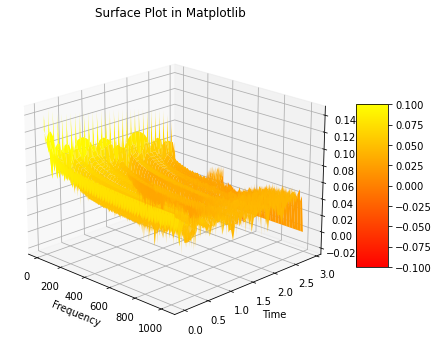

''

In [629]:
import matplotlib.pyplot as plt
from matplotlib import cm

(x, y) = np.meshgrid(np.linspace(0, stack.shape[1], stack.shape[1]), np.linspace(0, length, stack.shape[0]))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20., azim=-45)



the_plot = ax.plot_surface(x, y, stack / 1000 ,cmap='autumn', shade=True)
ax.set_title('Surface Plot in Matplotlib')
ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
fig.colorbar(the_plot, shrink=0.5, aspect=5)
plt.show()
;